In [1]:
#dependencies & setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sunroof_city = "project-sunroof-city-09082017.csv"
sunroof_zipcode = "project-sunroof-postal_code-09082017.csv"

In [4]:
# Import csv file
city_data = pd.read_csv(sunroof_city)
city_data_clean = city_data.dropna()

 # Extract first collumns of comparison
city_df = city_data_clean.iloc[:,[0,1,30,9,10,11,27,29]]

In [ ]:

# District Summary.DataFrame
district_summary = pd.DataFrame({"City": [region_name],
                                "State": [state_name],
                                "# Existing Installs": [existing_installs_count],
                                "# Buildings Qualified": [count_qualified],
                                "Yearly Sunlight Total (kwh)": [yearly_sunlight_kwh_total],
                                "Potential Carbon Abatement (metric tons)": [carbon_offset_metric_tons],
district_summary

#formatting
district_summary.style.format({"Total Students": "{:,}",
                               "Total Budget": "${:,.2f}",
                               "Average Math Score": "{:.2f}%",
                               "Average Reading Score": "{:.2f}%",
                               "% Passing Math": "{:.2f}%",
                               "% Passing Reading": "{:.2f}%",
                               "% Overall Passing Rate": "{:.2f}%"})

In [6]:
#Find St. Louis data for comparisons 
find_STL = city_data_clean.set_index("region_name", drop = False)
STL = find_STL.loc["St. Louis", : ]

STL_df = pd.DataFrame({'region_name':('St. Louis'),
                       'state_name':('Missouri'),
                       'count_qualified': (97382),
                       'percent_qualified':(70.9151),
                       'yearly_sunlight_kwh_total': (2.10731e+09),
                       'carbon_offset_metric_tons': (1.77815e+06),
                       'existing_installs_count': [405]})
STL_df

,region_name,state_name,count_qualified,percent_qualified,yearly_sunlight_kwh_total,carbon_offset_metric_tons,existing_installs_count
0,St. Louis,Missouri,97382,70.9151,2.107310e+09,1778150.0,405


In [7]:
count_qualified = city_df.dropna(how='all').sort_values('count_qualified', ascending = False)
clean_count_qualified = count_qualified.dropna()
top_count_qualified = clean_count_qualified.head(10)

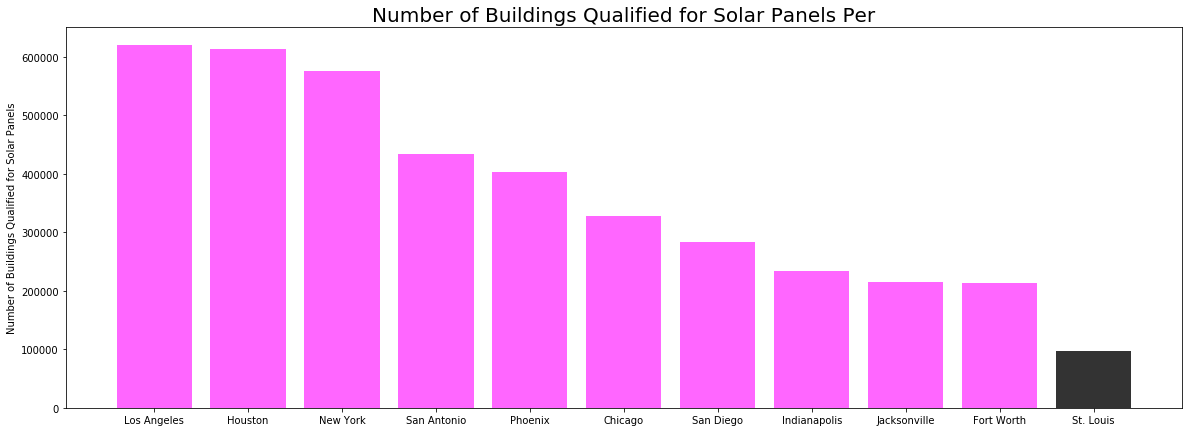

In [8]:
#bar chart of most buildings qualified
plt.figure(figsize=(20,7))
xaxis1= np.array(top_count_qualified['region_name'])
yaxis = np.array(top_count_qualified['count_qualified'])
y2= np.array(top_count_qualified['yearly_sunlight_kwh_total'])
y3= np.array(top_count_qualified['yearly_sunlight_kwh_total'])
xaxis2=np.array(STL_df['region_name'])
yaxis2 =np.array(STL_df["count_qualified"])
plt.bar(xaxis1, yaxis, color='magenta', alpha=0.6, align="center")
plt.bar(xaxis2, yaxis2, color='black', alpha=0.8, align="center")


plt.title('Number of Buildings Qualified for Solar Panels Per', fontsize=20)

plt.ylabel('Number of Buildings Qualified for Solar Panels')


# Save Figure
plt.savefig('TopQualifiedBAR.png')

In [9]:
city_installs = city_df.sort_values('existing_installs_count', ascending = False)
clean_city_installs = city_installs.dropna()
top_city_installs = clean_city_installs.head(10)


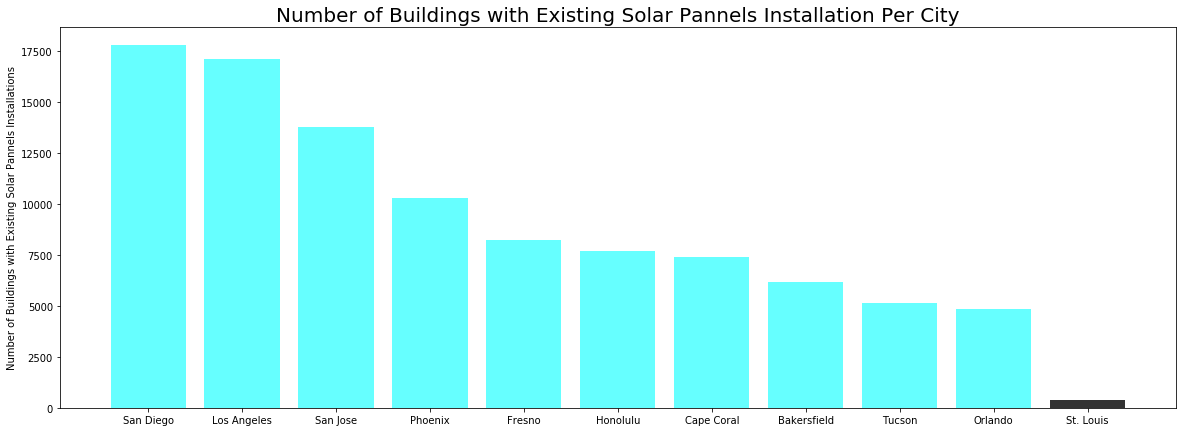

In [10]:
#bar chart of top city installs
plt.figure(figsize=(20,7))
xaxis1= np.array(top_city_installs['region_name'])
yaxis = np.array(top_city_installs['existing_installs_count'])
xaxis2=np.array(STL_df['region_name'])
yaxis2 =np.array(STL_df["existing_installs_count"])
plt.bar(xaxis1, yaxis, color='cyan', alpha=0.6, align="center")
plt.bar(xaxis2, yaxis2, color='black', alpha=0.8, align="center")


plt.title('Number of Buildings with Existing Solar Pannels Installation Per City', fontsize=20)

plt.ylabel('Number of Buildings with Existing Solar Pannels Installations')


# Save Figure
plt.savefig('TopInstallsBAR.png')

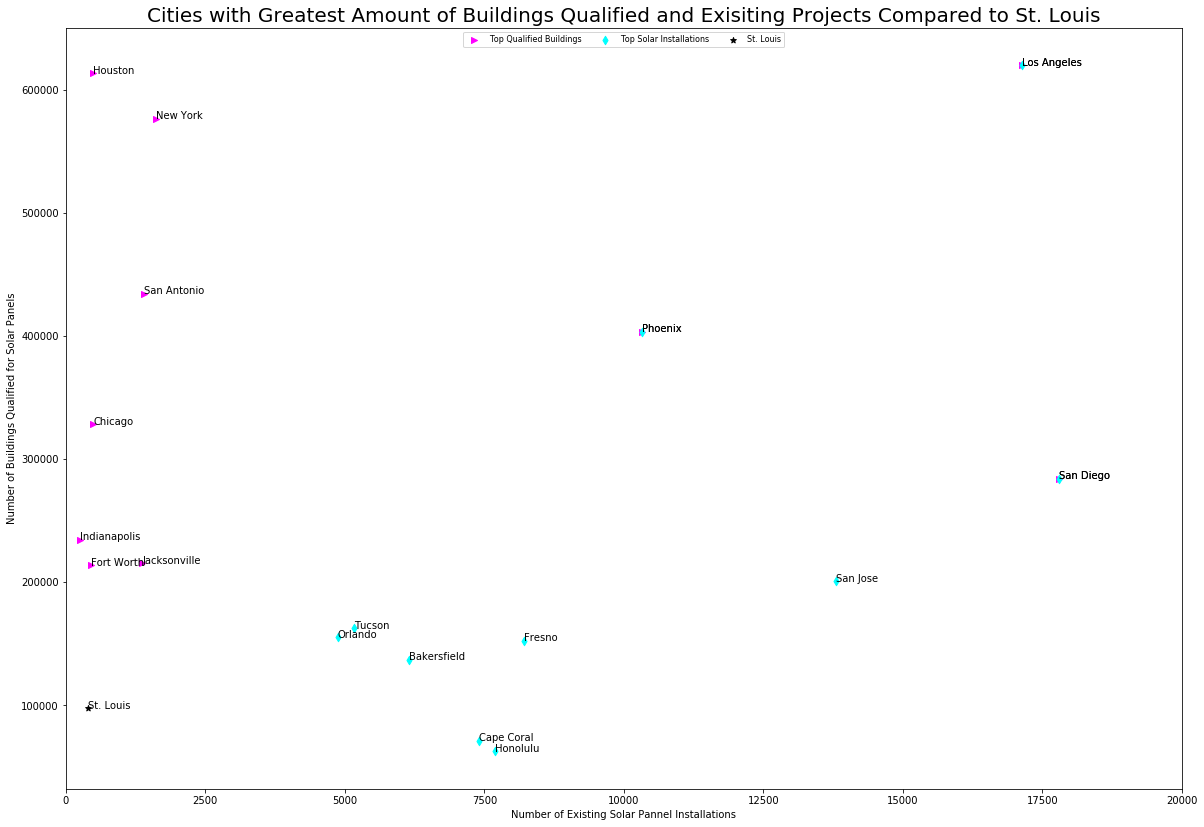

In [332]:
plt.figure(figsize=(20,14))

test1=np.array(top_count_qualified['existing_installs_count'])
test2=np.array(top_count_qualified['count_qualified'])
variablelabel = np.array(top_count_qualified.region_name)
Top_Qualified = plt.scatter(test1, test2, color='magenta', marker=">")
for i, txt in enumerate(variablelabel):
    plt.annotate(txt, (test1[i], test2[i]))

test3=np.array(top_city_installs['existing_installs_count'])
test4=np.array(top_city_installs['count_qualified'])
variablelabel2 = np.array(top_city_installs.region_name)
Top_Installs = plt.scatter(test3, test4, color='cyan', marker="d")
for i, txt in enumerate(variablelabel2):
    plt.annotate(txt, (test3[i], test4[i]))

test5=np.array(STL['existing_installs_count'])
test6=np.array(STL['count_qualified'])
variablelabel3 = np.array(STL.region_name)
STL_plot = plt.scatter(test5, test6, color='black', marker="*")
plt.annotate('St. Louis', (test5, test6))

plt.title('Cities with Greatest Amount of Buildings Qualified and Exisiting Projects Compared to St. Louis', 
          fontsize=20)
plt.xlabel('Number of Existing Solar Pannel Installations')
plt.ylabel('Number of Buildings Qualified for Solar Panels')
plt.xlim(0, 20000)


# Create a legend

#plt.legend(test1,test2,test3,test4,test5,test6)
plt.legend((Top_Qualified, Top_Installs, STL_plot),
           ('Top Qualified Buildings', 'Top Solar Installations', 'St. Louis'),
           scatterpoints=1, loc='upper center', ncol=3, fontsize=8)

# Save Figure
plt.savefig('TopCityInstalls&Qualified.png')

plt.show()



In [11]:
total_light = city_df.sort_values('yearly_sunlight_kwh_total', ascending=False)
clean_total_light = total_light.dropna()
top_light = clean_total_light.head(10)

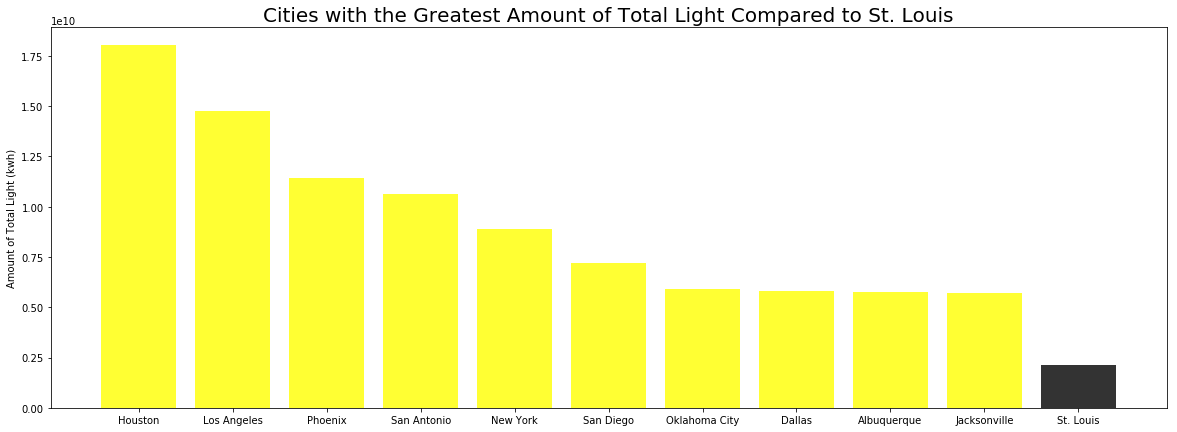

In [331]:
#bar chart of most light
plt.figure(figsize=(20,7))
xaxis1=np.array(top_light['region_name'])
yaxis =np.array(top_light['yearly_sunlight_kwh_total'])
xaxis2=np.array(STL_df['region_name'])
yaxis2 =np.array(STL_df["yearly_sunlight_kwh_total"])
plt.bar(xaxis1, yaxis, color='yellow', alpha=0.8, align="center")
plt.bar(xaxis2, yaxis2, color='black', alpha=0.8, align="center")


plt.title('Cities with the Greatest Amount of Total Light Compared to St. Louis', fontsize=20)

plt.ylabel('Amount of Total Light (kwh)')


# Save Figure
plt.savefig('TopLightBAR.png')

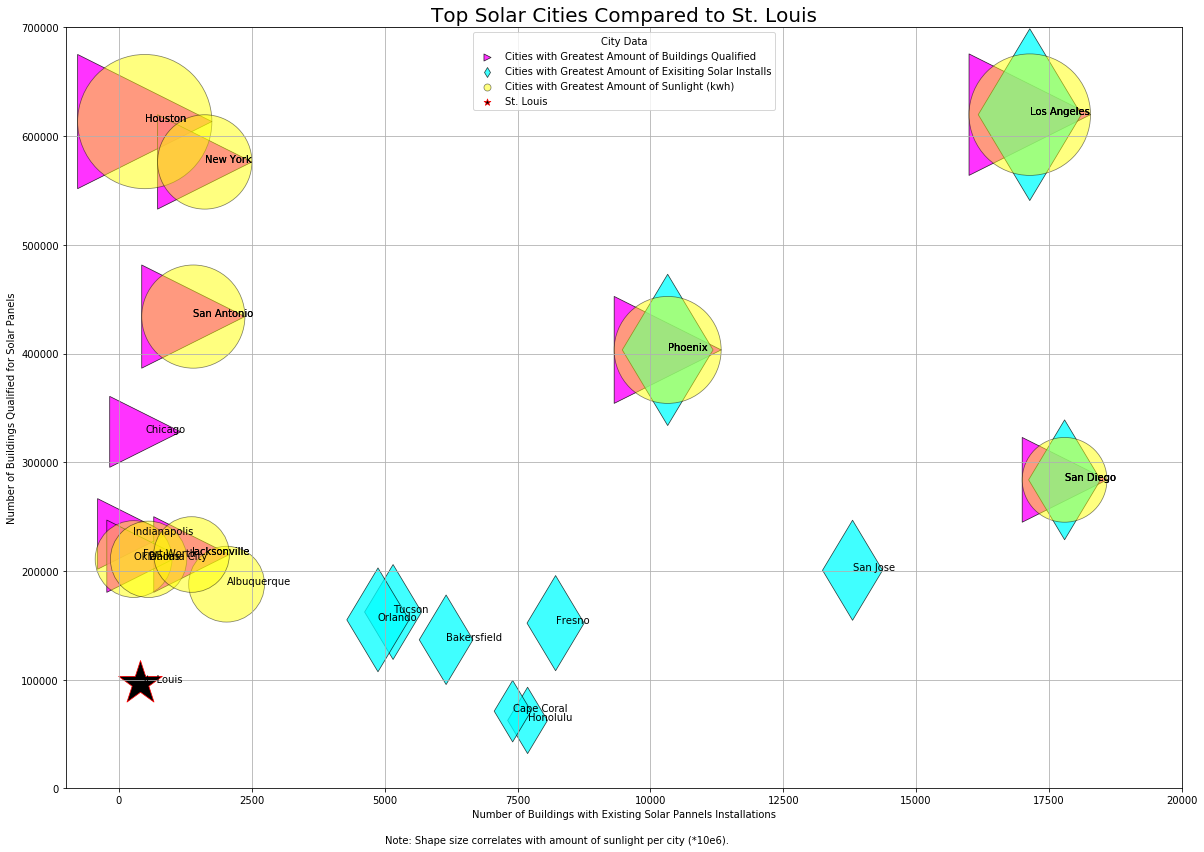

In [361]:

plt.figure(figsize=(20,14))
test1=np.array(top_count_qualified['count_qualified'])
test2=np.array(top_count_qualified['yearly_sunlight_kwh_total']/1000000)
test3=np.array(top_count_qualified['existing_installs_count'])
variablelabel = np.array(top_count_qualified.region_name)

plt.scatter(x=test3,y=test1,s=test2,
            color= 'magenta', edgecolor='k',
            label= 'Cities with Greatest Amount of Buildings Qualified', alpha =.8, linewidth= .75, marker=">")

for i, txt in enumerate(variablelabel):
    plt.annotate(txt, (test3[i], test1[i]))
    

test4=np.array(top_city_installs['existing_installs_count'])
test5=np.array(top_city_installs['count_qualified'])
test6=np.array(top_city_installs['yearly_sunlight_kwh_total']/1000000)
variablelabel2 = np.array(top_city_installs.region_name)

plt.scatter(x=test4,y=test5,s=test6,
            color= 'cyan', edgecolor='k',
            label= 'Cities with Greatest Amount of Exisiting Solar Installs', alpha =.75, linewidth= .75, marker="d")

for i, txt in enumerate(variablelabel2):
    plt.annotate(txt, (test4[i], test5[i]))
    
    
    
test7=np.array(top_light['existing_installs_count'])
test8=np.array(top_light['count_qualified'])
test9=np.array(top_light['yearly_sunlight_kwh_total']/1000000)
variablelabel3 = np.array(top_light.region_name)

plt.scatter(x=test7,y=test8,s=test9,
            color= 'yellow', edgecolor='k',
            label= 'Cities with Greatest Amount of Sunlight (kwh)', alpha =.5, linewidth= .75, marker="o")

for i, txt in enumerate(variablelabel3):
    plt.annotate(txt, (test7[i], test8[i]))
      
    
test10=np.array(STL['existing_installs_count'])
test11=np.array(STL['count_qualified'])
test12=np.array(STL['yearly_sunlight_kwh_total']/1000000)

plt.scatter(x=test10,y=test11,s=test12,
            color= 'black', edgecolor='r',
            label= 'St. Louis', alpha =1, linewidth= .75, marker="*")

plt.annotate('St. Louis', (test10, test11))


plt.title('Top Solar Cities Compared to St. Louis', fontsize=20)
plt.xlabel('Number of Buildings with Existing Solar Pannels Installations')
plt.ylabel('Number of Buildings Qualified for Solar Panels')
plt.xlim(-1000, 20000)
plt.ylim(0, 700000)

# Create a legend

legend = plt.legend(loc = "upper center", fontsize= 10, numpoints =1, 
                    scatterpoints=1, title= 'City Data', labelspacing = .5)
# make bubbles the same size
legend.legendHandles[0]._sizes = [50]
legend.legendHandles[1]._sizes = [50]
legend.legendHandles[2]._sizes = [50]
legend.legendHandles[3]._sizes = [50]

#reference regarding cicle size
plt.text(5000,-50000, "Note: Shape size correlates with amount of sunlight per city (*10e6).")
plt.grid(b=None, which='major', axis='both')
plt.savefig('CitiesBubble.png')
plt.show()
# Save Figure

In [303]:
bottom_count_qualified = clean_count_qualified.tail(10).sort_values('count_qualified', ascending=True)
bottom_city_installs = clean_city_installs.tail(10).sort_values('existing_installs', ascending=True)
bottom_light = clean_total_light.tail(10).sort_values('yearly_sunlight_kwh_total', ascending=True)

,region_name,state_name,existing_installs_count,count_qualified,percent_covered,percent_qualified,yearly_sunlight_kwh_total,carbon_offset_metric_tons
7470,Wernersville,Pennsylvania,0,1,0.096618,100.0,39842.715723,25.318477
3927,Linden,Pennsylvania,0,1,5.263158,100.0,9982.612189,6.343557
5274,Oswego,South Carolina,0,1,100.000000,100.0,12882.969385,7.562902
2827,Groton,New York,0,1,0.180180,100.0,8638.926855,3.156826
940,Cameron,North Carolina,0,1,0.277778,50.0,4348.893744,2.553003
1969,Echo,Oregon,0,1,0.422833,50.0,57745.686743,15.355060
2836,Grover,North Carolina,0,1,0.278552,100.0,5251.022546,3.082594
5512,Pikeville,North Carolina,0,1,0.199203,100.0,15171.760608,8.906529
7218,Valparaiso,Florida,0,1,0.052882,100.0,136499.322498,81.160597
786,Brookdale,California,0,1,100.000000,100.0,8181.659229,2.230574


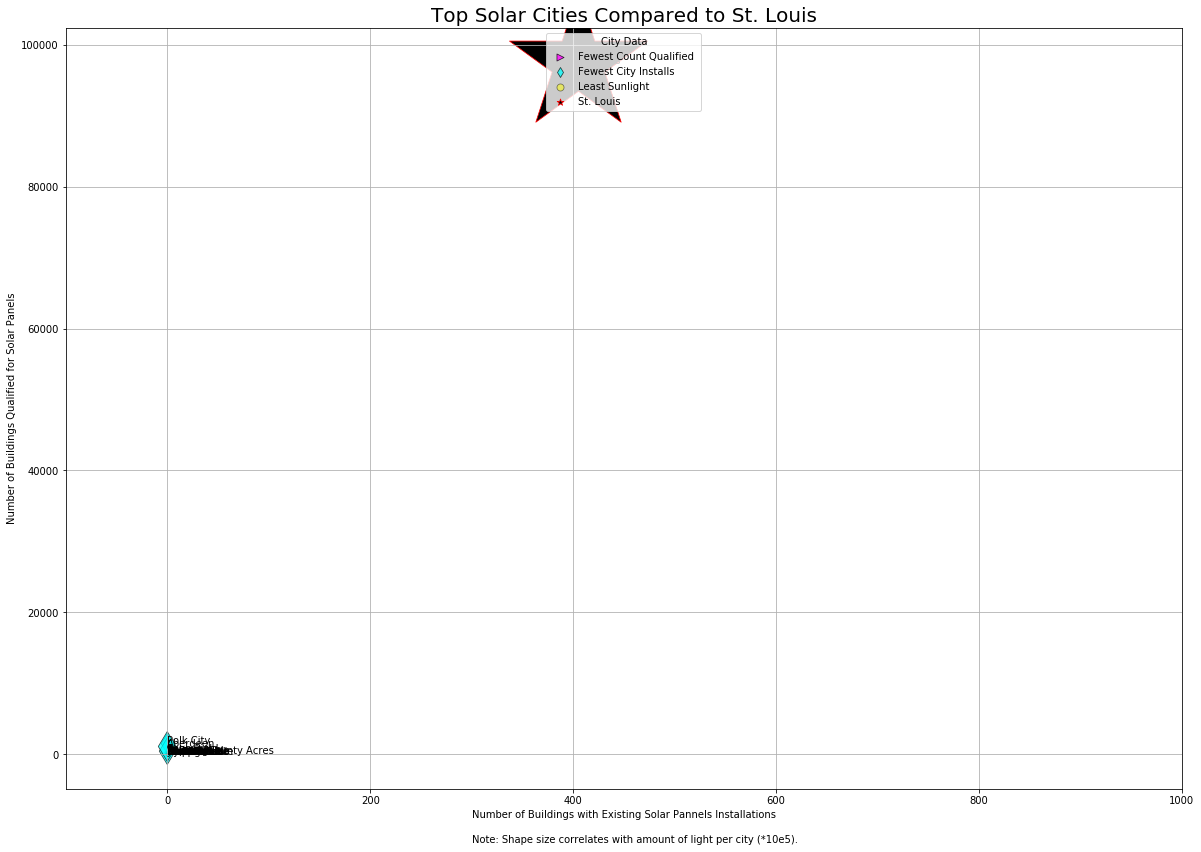

In [360]:
plt.figure(figsize=(20,14))
test1=np.array(bottom_count_qualified ['count_qualified'])
test2=np.array(bottom_count_qualified ['yearly_sunlight_kwh_total']/100000)
test3=np.array(bottom_count_qualified ['existing_installs_count'])
variablelabel = np.array(bottom_count_qualified.region_name)

plt.scatter(x=test3,y=test1,s=test2,
            color= 'magenta', edgecolor='k',
            label= 'Fewest Count Qualified ', alpha =.8, linewidth= .75, marker=">")

for i, txt in enumerate(variablelabel):
    plt.annotate(txt, (test3[i], test1[i]))
    

test4=np.array(bottom_city_installs['existing_installs_count'])
test5=np.array(bottom_city_installs['count_qualified'])
test6=np.array(bottom_city_installs['yearly_sunlight_kwh_total']/100000)
variablelabel2 = np.array(bottom_city_installs.region_name)

plt.scatter(x=test4,y=test5,s=test6,
            color= 'cyan', edgecolor='k',
            label= 'Fewest City Installs', alpha =.75, linewidth= .75, marker="d")


for i, txt in enumerate(variablelabel2):
    plt.annotate(txt, (test4[i], test5[i]))
    
    
    
test7=np.array(bottom_light['existing_installs_count'])
test8=np.array(bottom_light['count_qualified'])
test9=np.array(bottom_light['yearly_sunlight_kwh_total']/100000)
variablelabel3 = np.array(bottom_light.region_name)

plt.scatter(x=test7,y=test8,s=test9,
            color= 'yellow', edgecolor='k',
            label= 'Least Sunlight', alpha =.5, linewidth= .75, marker="o")

for i, txt in enumerate(variablelabel3):
    plt.annotate(txt, (test7[i], test8[i]))
      
    
test10=np.array(STL['existing_installs_count'])
test11=np.array(STL['count_qualified'])
test12=np.array(STL['yearly_sunlight_kwh_total']/100000)

plt.scatter(x=test10,y=test11,s=test12,
            color= 'black', edgecolor='r',
            label= 'St. Louis', alpha =1, linewidth= .75, marker="*")

plt.annotate('St. Louis', (test10, test11))


plt.title('Top Solar Cities Compared to St. Louis', fontsize=20)
plt.xlabel('Number of Buildings with Existing Solar Pannels Installations')
plt.ylabel('Number of Buildings Qualified for Solar Panels')
plt.xlim(-100, 1000)


# Create a legend

legend = plt.legend(loc = "upper center", fontsize= 10, numpoints =1, 
                    scatterpoints=1, title= 'City Data', labelspacing = .5)
# make bubbles the same size
legend.legendHandles[0]._sizes = [50]
legend.legendHandles[1]._sizes = [50]
legend.legendHandles[2]._sizes = [50]
legend.legendHandles[3]._sizes = [50]

#reference regarding cicle size
plt.text(300,-12500, "Note: Shape size correlates with amount of light per city (*10e5).")
plt.grid(b=None, which='major', axis='both')
plt.savefig('BottomCitiesBubble.png')
plt.show()
# Save Figure

In [475]:
result = pd.merge(top_count_qualified ,top_city_installs, how='outer')
pd.set_option('display.float_format', lambda x: '%.3f' % x)
all_data= pd.merge(result, STL_df, how= 'outer')
all_data

,region_name,state_name,existing_installs_count,count_qualified,percent_covered,percent_qualified,yearly_sunlight_kwh_total,carbon_offset_metric_tons
0,Los Angeles,California,17139,619752,97.074,79.960,14764203440.755,4025145.462
1,Houston,Texas,485,613381,93.867,82.798,18015896221.360,8763966.986
2,New York,New York,1614,576250,91.850,76.115,8903502799.032,5052119.136
3,San Antonio,Texas,1399,434008,97.910,92.352,10648881627.677,5178406.827
4,Phoenix,Arizona,10325,403357,95.609,92.227,11444893880.572,4928548.697
5,Chicago,Illinois,493,328000,96.126,66.791,5032223518.219,4165919.243
6,San Diego,California,17794,283859,98.872,88.774,7186404755.131,1959150.539
7,Indianapolis,Indiana,262,234099,99.312,75.950,4983925176.433,4125962.192
8,Jacksonville,Florida,1366,215165,90.349,78.011,5719775942.767,3057368.937
9,Fort Worth,Texas,451,213615,93.826,87.568,5221446773.930,2539118.808


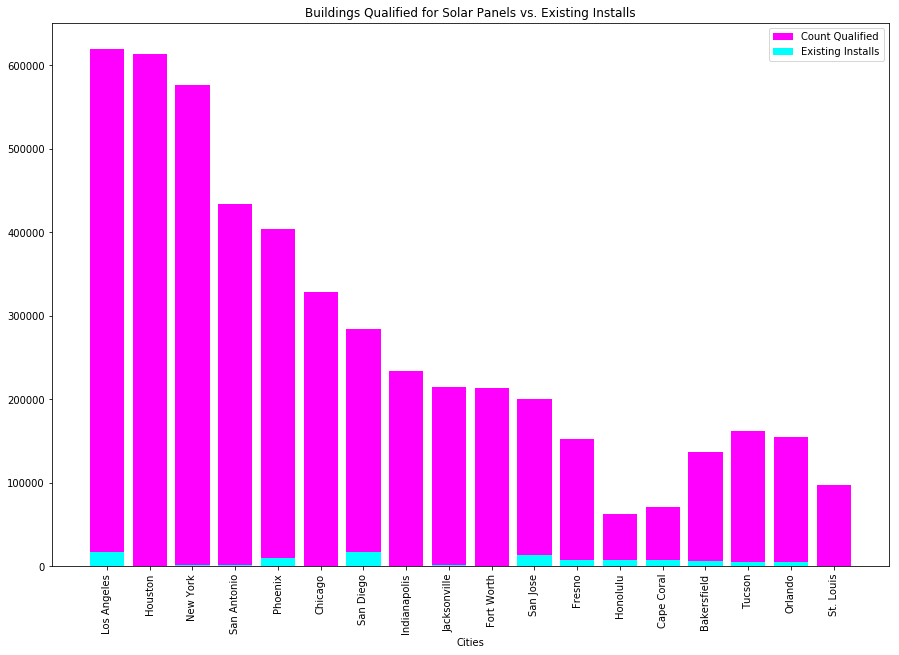

In [510]:


#bar chart of most light
plt.figure(figsize=(15,10))


x1= np.array(all_data['region_name'])
y1 = np.array(all_data['count_qualified'])
y2= np.array(all_data['existing_installs_count'])


p1= plt.bar(x1, y1, color='magenta', align="center")
p2= plt.bar(x1, y2, color='cyan', align="center")




plt.title('Buildings Qualified for Solar Panels vs. Existing Installs', fontsize=12)
plt.xlabel('Cities')

plt.xticks(rotation='vertical')
plt.legend((p1[0], p2[0]), ('Count Qualified', 'Existing Installs'))


# Save Figure
plt.savefig('ALLBARR.png')
plt.show()